In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


# possible_n_vals = [10, 12, 14, 16]
# possible_e_vals = [1, 2, 3, 4, 5]

possible_n_vals = [10,12,14,16,18,20]
possible_e_vals = [3]

def run_poly_logistic_regression(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test
    print(X_train.shape)
    # Create polynomial features (set degree as desired)
    degree = e
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    print(X_train_poly.shape)
    features = X_train_poly.shape[-1]
    print("Created features")

    # Initialize and fit logistic regression
    logreg = LogisticRegression(max_iter=100, solver='sag', C=0.85)

    logreg.fit(X_train_poly, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = logreg.predict(X_val_poly)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy, features
        

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC

possible_n_vals = [10,12,14,16,18,20]
possible_e_vals = [4]

def run_poly_logistic_regression(n, e, n_components=10):
    """
    Logistic regression with polynomial feature expansion and PCA dimensionality reduction.
    
    Args:
        n (int): Dataset parameter (e.g., 10, 12, 14, 16, ...)
        e (int): Polynomial degree
        n_components (float or int): 
            If float (0 < n_components < 1): keep that fraction of explained variance.
            If int: keep that many PCA components.
    """
    # --- Load data ---
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")

    # --- Split (60 train, 20 val, 20 test) ---
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Polynomial feature expansion ---
    poly = PolynomialFeatures(degree=e)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    print(f"Expanded to {X_train_poly.shape[1]} features")

    #- Standardize (important for PCA) ---
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    print("Data scaled")

    # --- Apply PCA ---
    pca =PCA(n_components=20)
    X_train_pca = pca.fit_transform(X_train_poly)
    X_val_pca = pca.transform(X_val_poly)
    X_test_pca = pca.transform(X_test_poly)
    print(f"PCA reduced to {X_train_pca.shape[1]} components (kept {n_components} variance)")

    # --- Train Logistic Regression ---
    #logreg = LogisticRegression(max_iter=1000, solver='sag', C=0.85)
    logreg = SVC(kernel='rbf', C=1, gamma='scale')
    logreg.fit(X_train_pca, y_train)
    print("✅ Fitted final logistic regression")

    # --- Evaluate ---
    y_val_pred = logreg.predict(X_val_pca)
    y_test_pred = logreg.predict(X_test_pca)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Test Accuracy:       {test_acc:.4f}")

    return test_acc, X_train_pca.shape[1]




In [13]:
from tqdm import tqdm

acc_by_n = []
feat_by_n = []
for n in tqdm(possible_n_vals):
    single_n = []
    single_feat = []
    for e in tqdm(possible_e_vals):
        acc, feat = run_poly_logistic_regression(n, e)
        single_n.append(acc)
        single_feat.append(feat)
    acc_by_n.append(single_n)
    feat_by_n.append(single_feat)

print(acc_by_n)


  0%|          | 0/6 [00:00<?, ?it/s]

Expanded to 1001 features
Data scaled
PCA reduced to 20 components (kept 10 variance)
✅ Fitted final logistic regression


 17%|█▋        | 1/6 [00:18<01:30, 18.01s/it]

Validation Accuracy: 0.6740
Test Accuracy:       0.6803


Expanded to 1820 features
Data scaled
PCA reduced to 20 components (kept 10 variance)


 17%|█▋        | 1/6 [00:30<02:30, 30.19s/it]


KeyboardInterrupt: 

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

n = 10
X = np.load(f"Datasets/kryptonite-{n}-X.npy")
y = np.load(f"Datasets/kryptonite-{n}-y.npy")

# Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Example 1: RBF kernel
svm_rbf = SVC(kernel='rbf', C=0.85, gamma='scale')  # gamma='scale' is safe default
svm_rbf.fit(X_train, y_train)

print("RBF SVM:")
print(f"Train acc: {svm_rbf.score(X_train, y_train):.4f}")
print(f"Val acc:   {svm_rbf.score(X_val, y_val):.4f}")
print(f"Test acc:  {svm_rbf.score(X_test, y_test):.4f}")

RBF SVM:
Train acc: 0.6394
Val acc:   0.5487
Test acc:  0.5497


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# The Kryptonite dataset sizes you have
possible_n_vals = [10, 12, 14, 16, 18, 20]

# To store results
results = []

for n in possible_n_vals:
    print(f"\n===== Running MLP on kryptonite-{n} =====")
    # Load dataset
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Define 2-layer MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        max_iter=500,
        alpha=1e-4,
        random_state=42,
        verbose=False
    )

    # Train
    mlp.fit(X_train, y_train)

    # Predict
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_val)
    y_test_pred = mlp.predict(X_test)

    # Compute accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Store results
    results.append({
        "n": n,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "test_acc": test_acc
    })

    # Print progress
    print(f"✅ n={n} → train={train_acc:.4f}, val={val_acc:.4f}, test={test_acc:.4f}")

# After loop — print summary table
print("\n===== Summary =====")
for r in results:
    print(f"n={r['n']:<3d} | Train={r['train_acc']:.4f} | Val={r['val_acc']:.4f} | Test={r['test_acc']:.4f}")



===== Running MLP on kryptonite-10 =====
✅ n=10 → train=0.9636, val=0.9528, test=0.9522

===== Running MLP on kryptonite-12 =====
✅ n=12 → train=0.9610, val=0.9285, test=0.9333

===== Running MLP on kryptonite-14 =====
✅ n=14 → train=0.9652, val=0.9265, test=0.9326

===== Running MLP on kryptonite-16 =====
✅ n=16 → train=0.9403, val=0.8557, test=0.8601

===== Running MLP on kryptonite-18 =====


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ n=18 → train=0.9173, val=0.7614, test=0.7669

===== Running MLP on kryptonite-20 =====
✅ n=20 → train=0.7513, val=0.4959, test=0.5032

===== Summary =====
n=10  | Train=0.9636 | Val=0.9528 | Test=0.9522
n=12  | Train=0.9610 | Val=0.9285 | Test=0.9333
n=14  | Train=0.9652 | Val=0.9265 | Test=0.9326
n=16  | Train=0.9403 | Val=0.8557 | Test=0.8601
n=18  | Train=0.9173 | Val=0.7614 | Test=0.7669
n=20  | Train=0.7513 | Val=0.4959 | Test=0.5032


In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# The Kryptonite dataset sizes you have
possible_n_vals = [10, 12, 14, 16, 18, 20]
#possible_n_vals = [20]

# To store results
results = []

for n in possible_n_vals:
    print(f"\n===== Running MLP on kryptonite-{n} =====")
    # Load dataset
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Define 2-layer MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(64,32),
        activation='relu',
        solver='adam',
        max_iter=500,
        alpha=1e-4,
        random_state=42,
        verbose=False
        # learning_rate_init=0.001,
        # learning_rate='adaptive'
    )

    # Train
    mlp.fit(X_train, y_train)

    # Predict
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_val)
    y_test_pred = mlp.predict(X_test)

    # Compute accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Store results
    results.append({
        "n": n,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "test_acc": test_acc
    })

    # Print progress
    print(f"✅ n={n} → train={train_acc:.4f}, val={val_acc:.4f}, test={test_acc:.4f}")

# After loop — print summary table
print("\n===== Summary =====")
for r in results:
    print(f"n={r['n']:<3d} | Train={r['train_acc']:.4f} | Val={r['val_acc']:.4f} | Test={r['test_acc']:.4f}")



===== Running MLP on kryptonite-10 =====
✅ n=10 → train=0.9628, val=0.9557, test=0.9485

===== Running MLP on kryptonite-12 =====
✅ n=12 → train=0.9641, val=0.9344, test=0.9337

===== Running MLP on kryptonite-14 =====
✅ n=14 → train=0.9684, val=0.9384, test=0.9493

===== Running MLP on kryptonite-16 =====
✅ n=16 → train=0.9527, val=0.8986, test=0.8894

===== Running MLP on kryptonite-18 =====
✅ n=18 → train=0.9306, val=0.8210, test=0.8233

===== Running MLP on kryptonite-20 =====
✅ n=20 → train=0.9031, val=0.8055, test=0.8053

===== Summary =====
n=10  | Train=0.9628 | Val=0.9557 | Test=0.9485
n=12  | Train=0.9641 | Val=0.9344 | Test=0.9337
n=14  | Train=0.9684 | Val=0.9384 | Test=0.9493
n=16  | Train=0.9527 | Val=0.8986 | Test=0.8894
n=18  | Train=0.9306 | Val=0.8210 | Test=0.8233
n=20  | Train=0.9031 | Val=0.8055 | Test=0.8053


In [5]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# The Kryptonite dataset sizes you have
possible_n_vals = [10, 12, 14, 16, 18, 20]
#possible_n_vals = [20]

# To store results
results = []

for n in possible_n_vals:
    print(f"\n===== Running MLP on kryptonite-{n} =====")
    # Load dataset
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    print(
    f"Data shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}"
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Define 2-layer MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 64, 32),
        activation='relu',
        solver='adam',
        max_iter=500,
        alpha=0.1,
        random_state=42,
        verbose=False,
        learning_rate_init=0.001,
        batch_size=128,
        early_stopping=True,
        n_iter_no_change=50
    )

    # Train
    mlp.fit(X_train, y_train)

    # Predict
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_val)
    y_test_pred = mlp.predict(X_test)

    # Compute accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Store results
    results.append({
        "n": n,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "test_acc": test_acc
    })

    # Print progress
    print(f"✅ n={n} → train={train_acc:.4f}, val={val_acc:.4f}, test={test_acc:.4f}")

# After loop — print summary table
print("\n===== Summary =====")
for r in results:
    print(f"n={r['n']:<3d} | Train={r['train_acc']:.4f} | Val={r['val_acc']:.4f} | Test={r['test_acc']:.4f}")



===== Running MLP on kryptonite-10 =====
Data shapes -> X_train: (12000, 10), y_train: (12000,), X_val: (4000, 10), y_val: (4000,), X_test: (4000, 10), y_test: (4000,)
✅ n=10 → train=0.9603, val=0.9630, test=0.9557

===== Running MLP on kryptonite-12 =====
Data shapes -> X_train: (14400, 12), y_train: (14400,), X_val: (4800, 12), y_val: (4800,), X_test: (4800, 12), y_test: (4800,)
✅ n=12 → train=0.9607, val=0.9465, test=0.9481

===== Running MLP on kryptonite-14 =====
Data shapes -> X_train: (16800, 14), y_train: (16800,), X_val: (5600, 14), y_val: (5600,), X_test: (5600, 14), y_test: (5600,)
✅ n=14 → train=0.9554, val=0.9413, test=0.9477

===== Running MLP on kryptonite-16 =====
Data shapes -> X_train: (19200, 16), y_train: (19200,), X_val: (6400, 16), y_val: (6400,), X_test: (6400, 16), y_test: (6400,)
✅ n=16 → train=0.9387, val=0.9083, test=0.9006

===== Running MLP on kryptonite-18 =====
Data shapes -> X_train: (21600, 18), y_train: (21600,), X_val: (7200, 18), y_val: (7200,), X_t


===== Extended Evaluation =====
n=10  | Train=0.9603 | Val=0.9630 | Test=0.9557
n=12  | Train=0.9607 | Val=0.9465 | Test=0.9481
n=14  | Train=0.9554 | Val=0.9413 | Test=0.9477
n=16  | Train=0.9387 | Val=0.9083 | Test=0.9006
n=18  | Train=0.9270 | Val=0.8540 | Test=0.8614
n=20  | Train=0.9307 | Val=0.8634 | Test=0.8632


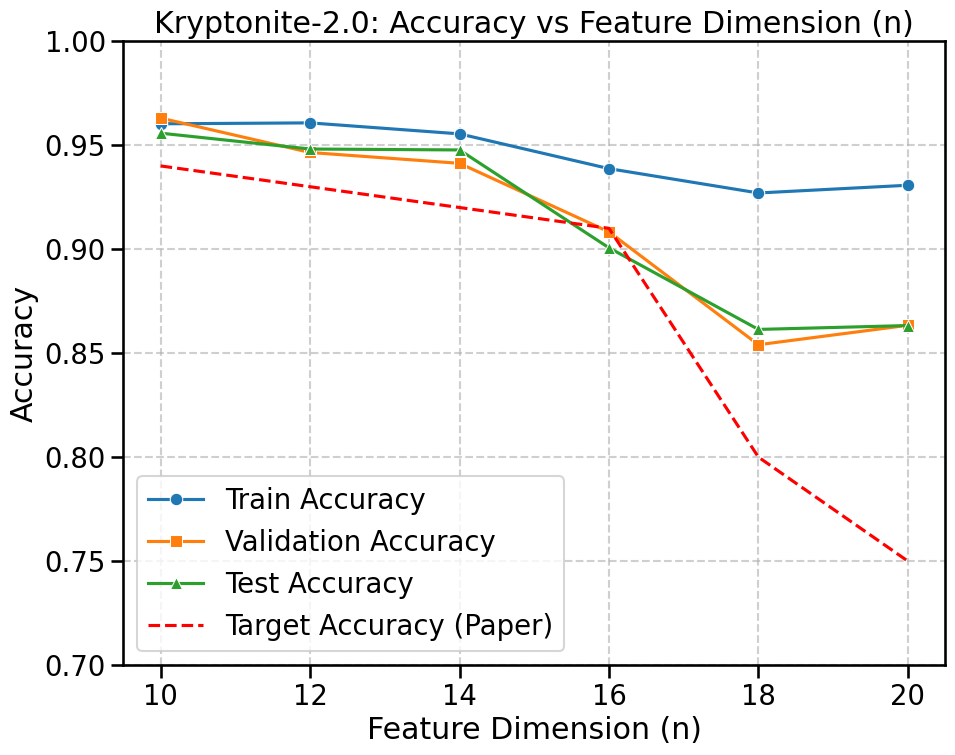


=== Detailed Analysis for n=10 ===


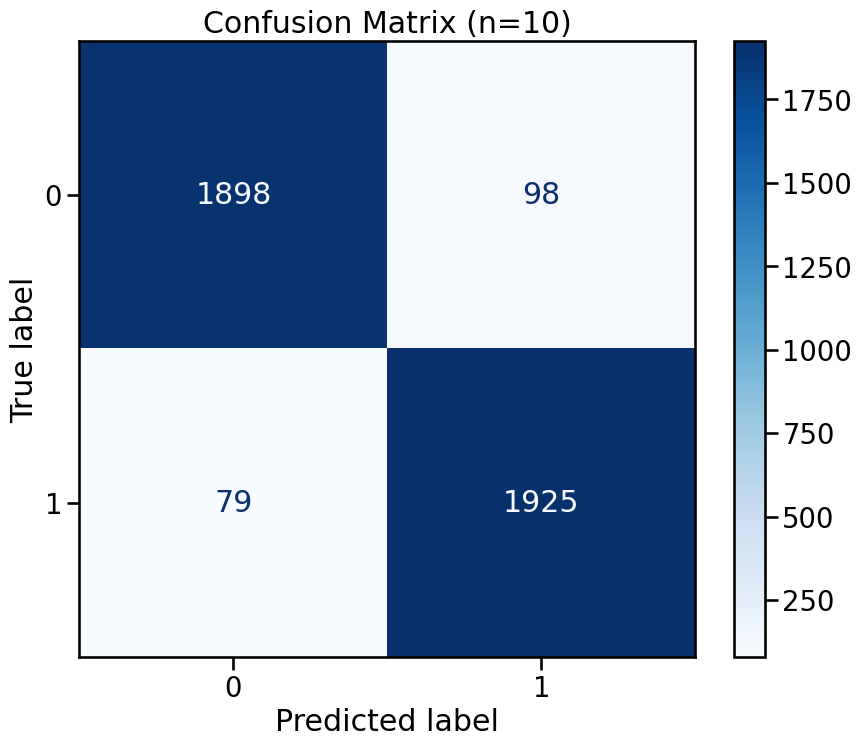

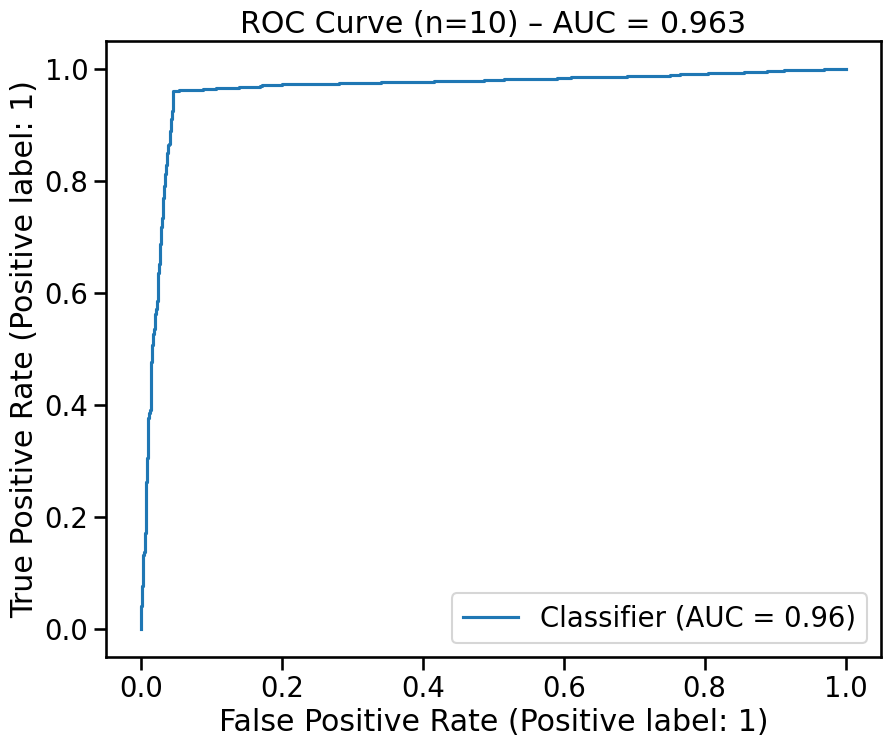

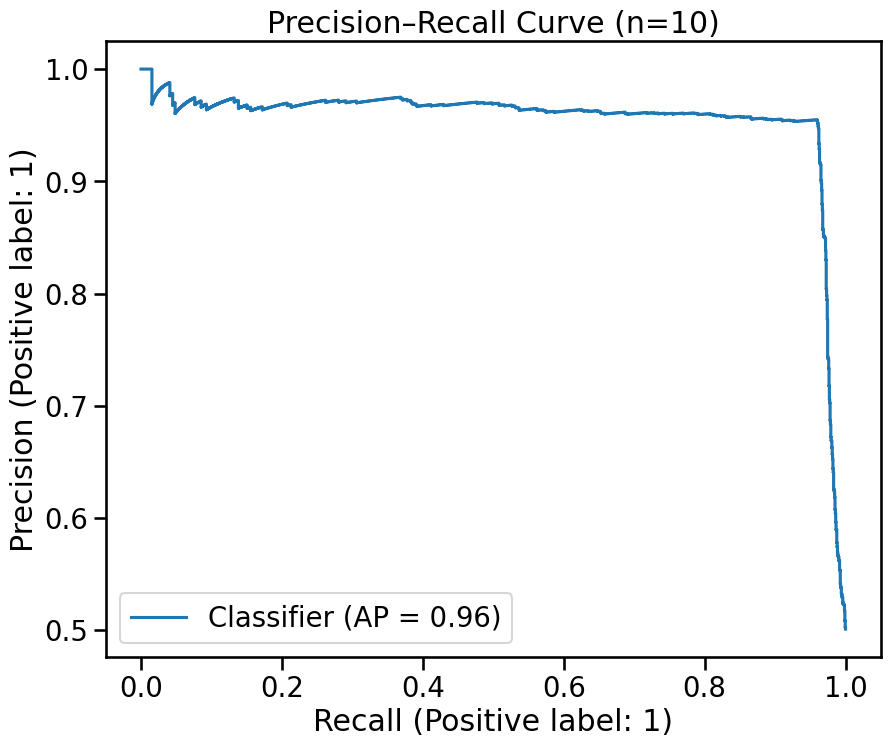

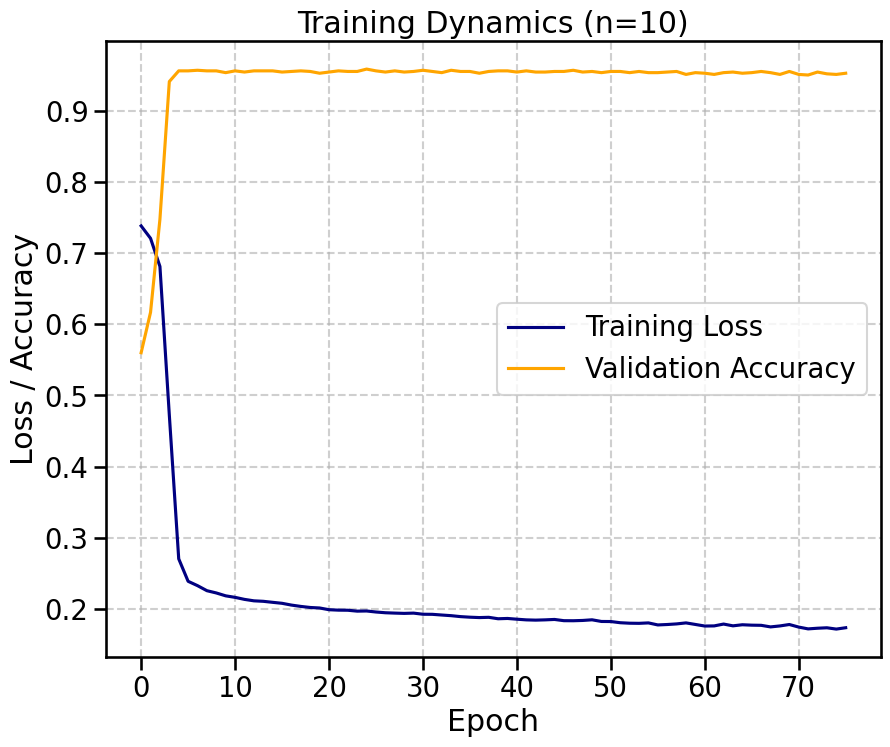

n=10 | Test Acc=0.9557 | F1=0.956 | AUC=0.963

=== Detailed Analysis for n=12 ===


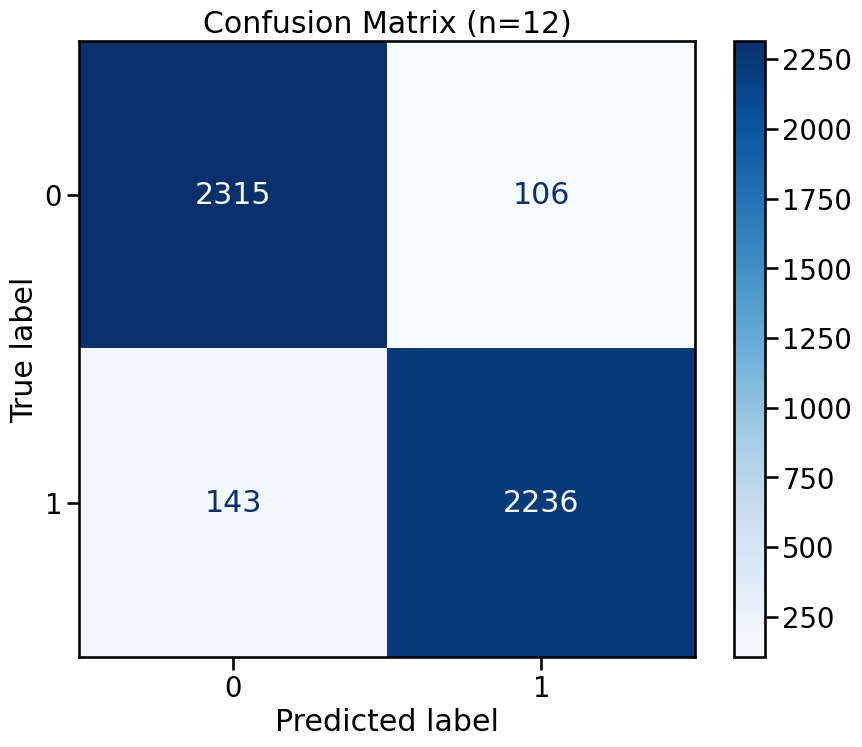

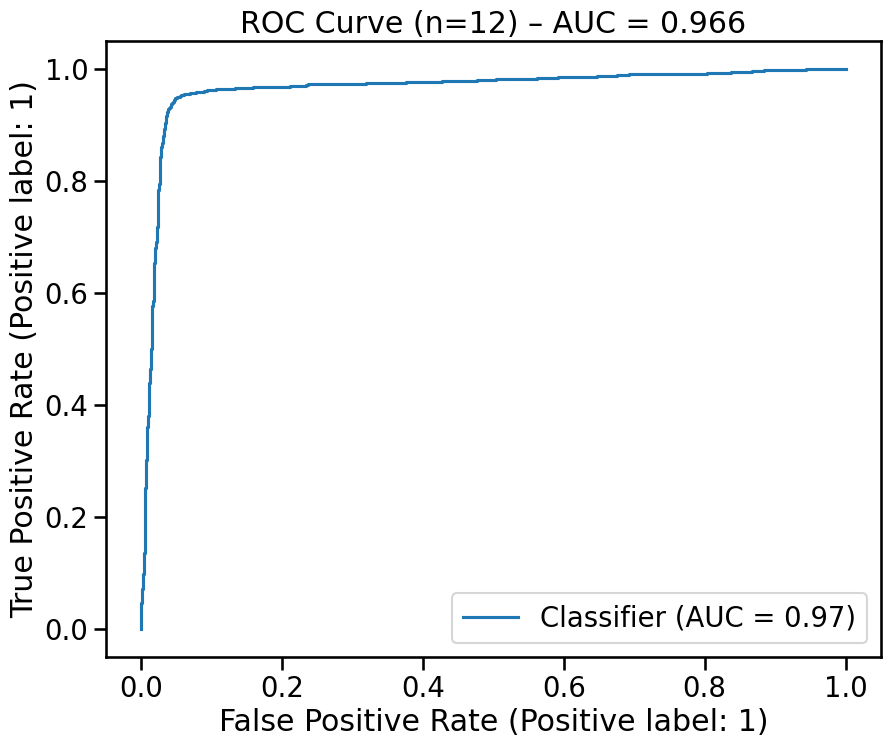

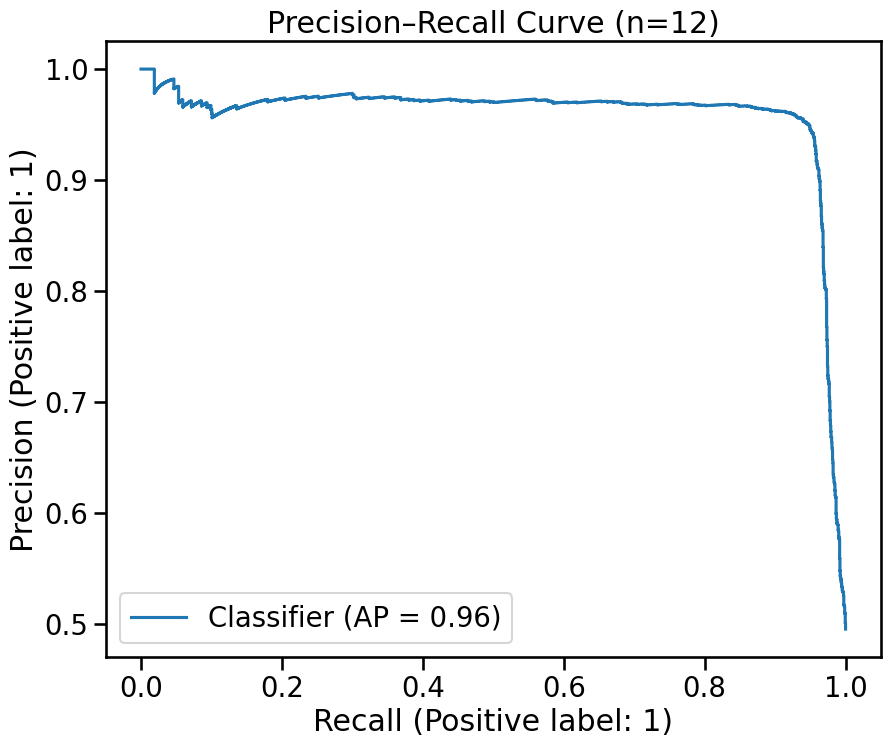

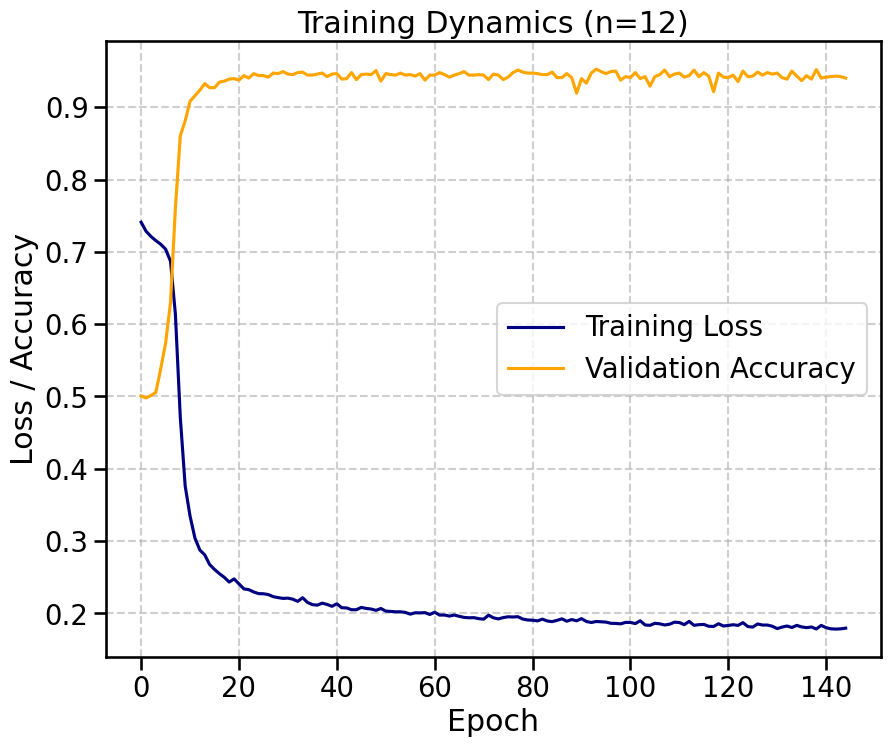

n=12 | Test Acc=0.9481 | F1=0.947 | AUC=0.966

=== Detailed Analysis for n=14 ===


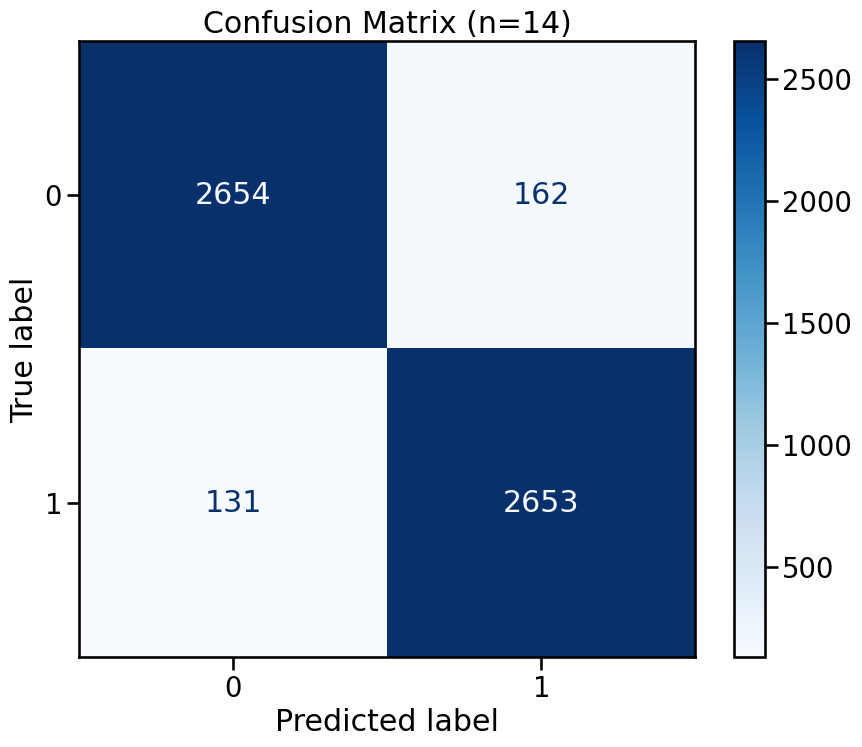

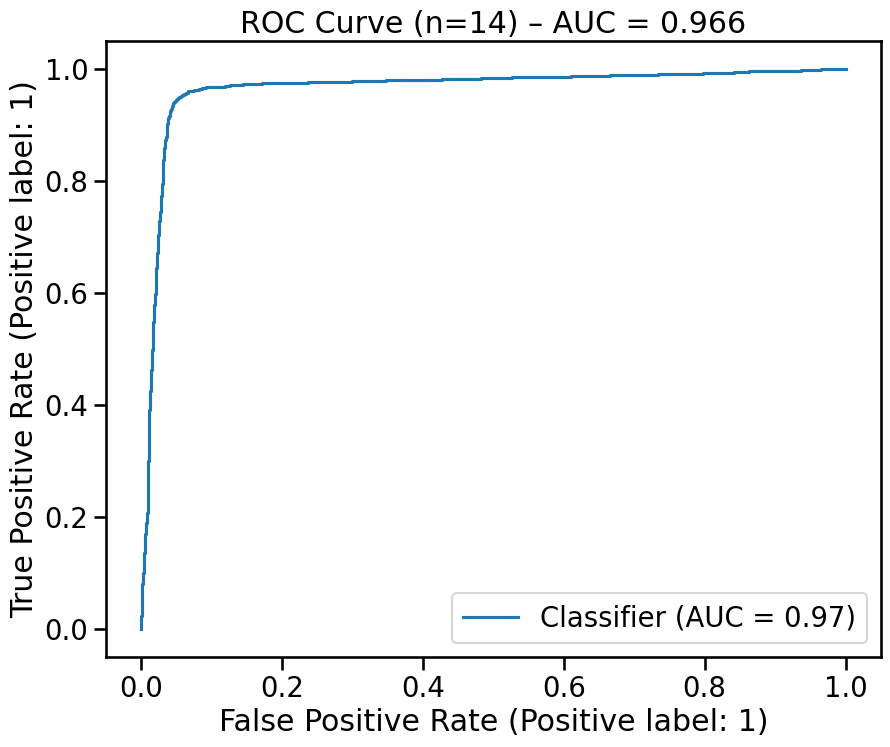

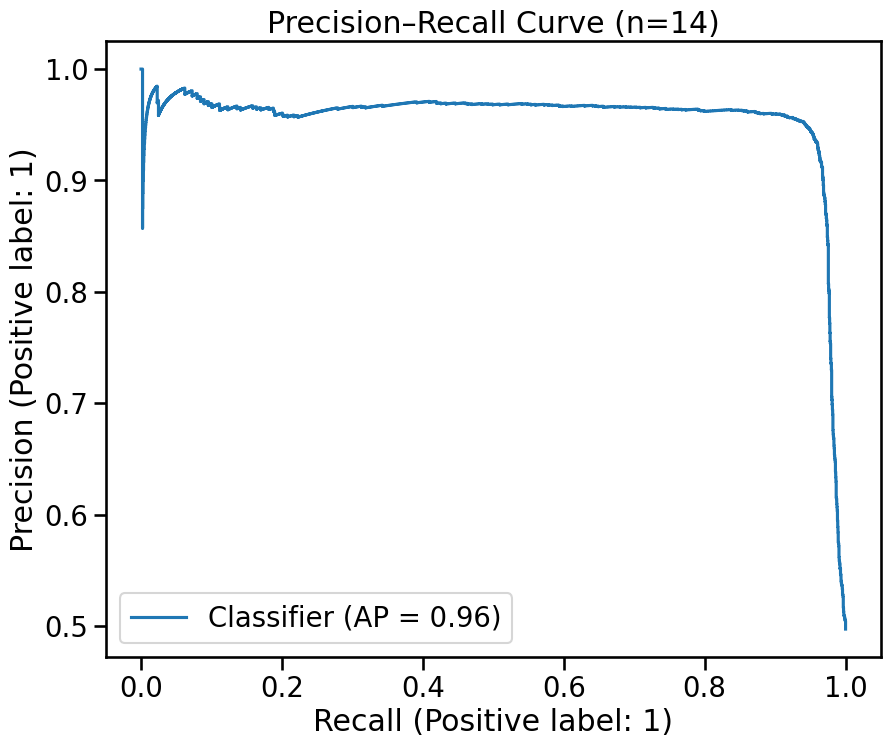

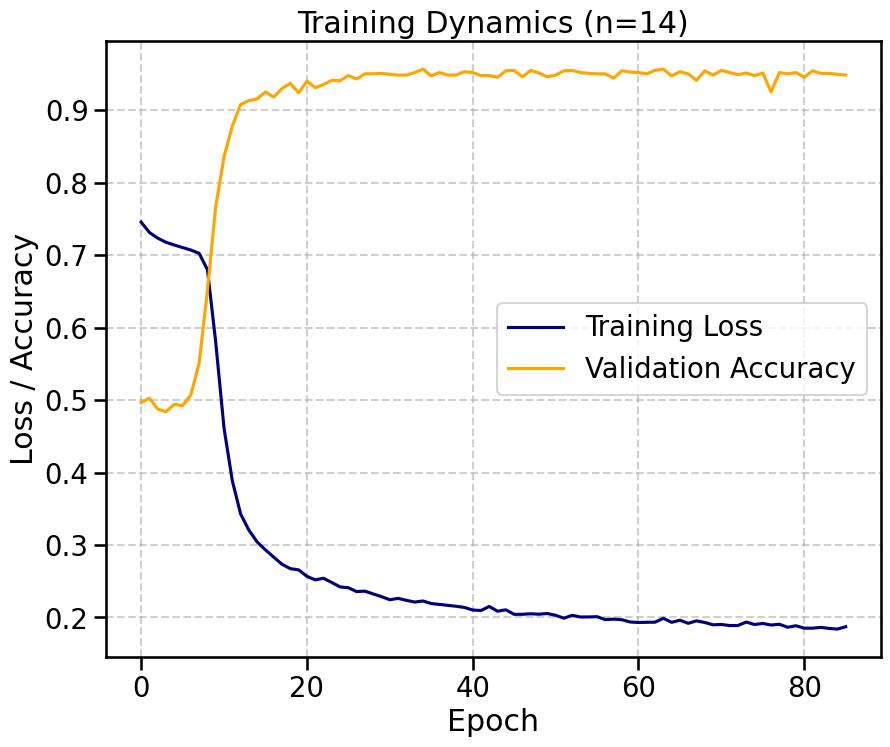

n=14 | Test Acc=0.9477 | F1=0.948 | AUC=0.966

=== Detailed Analysis for n=16 ===


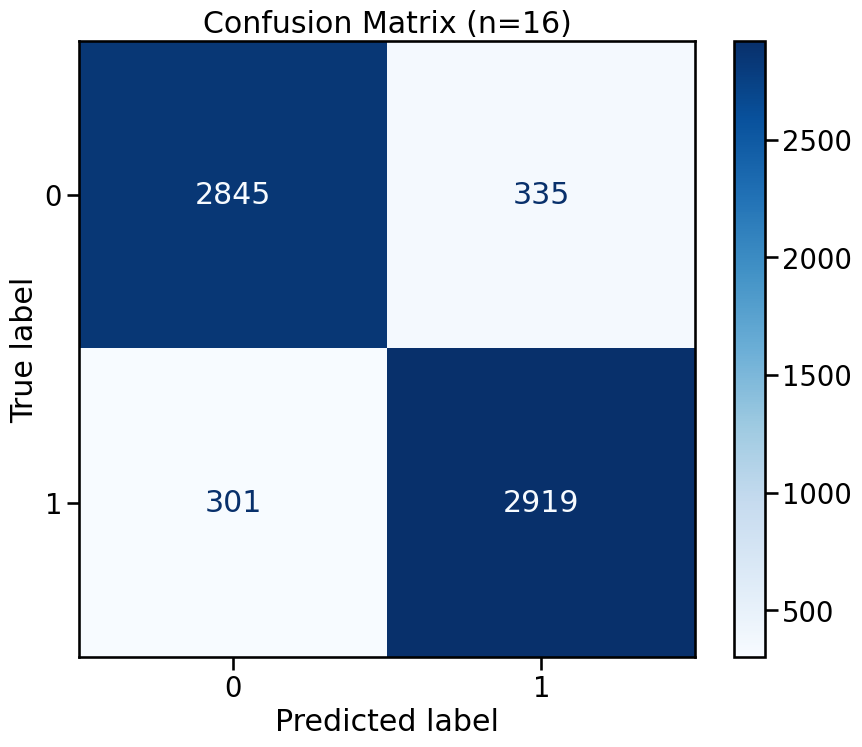

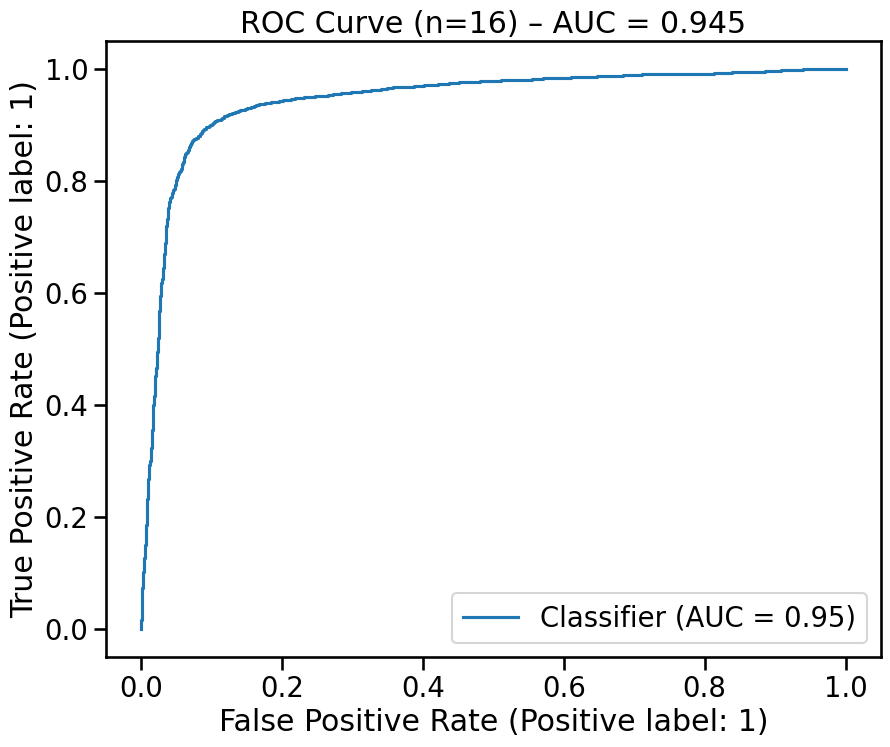

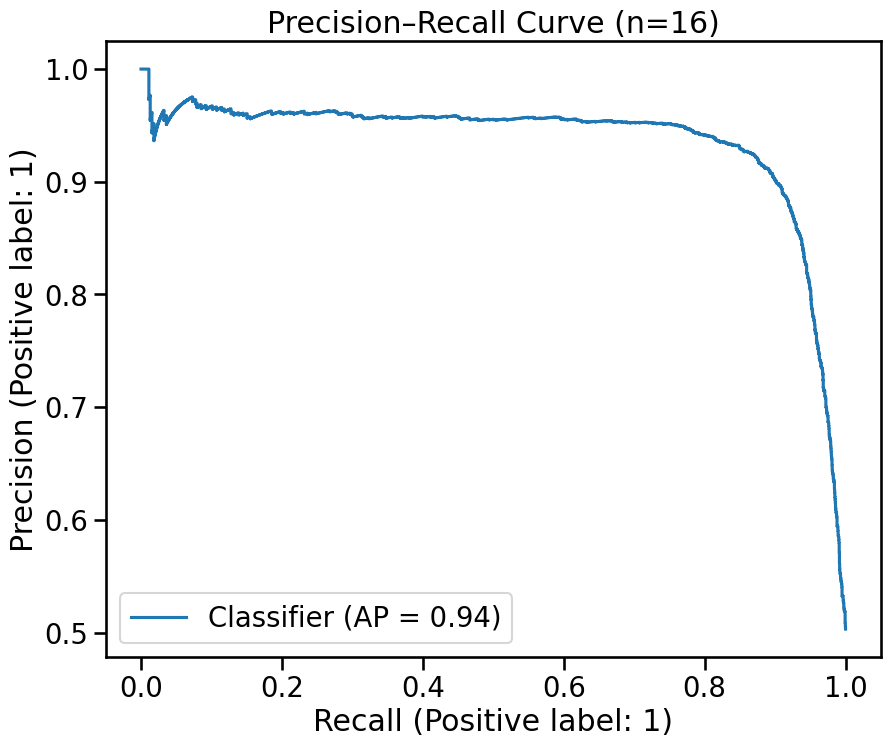

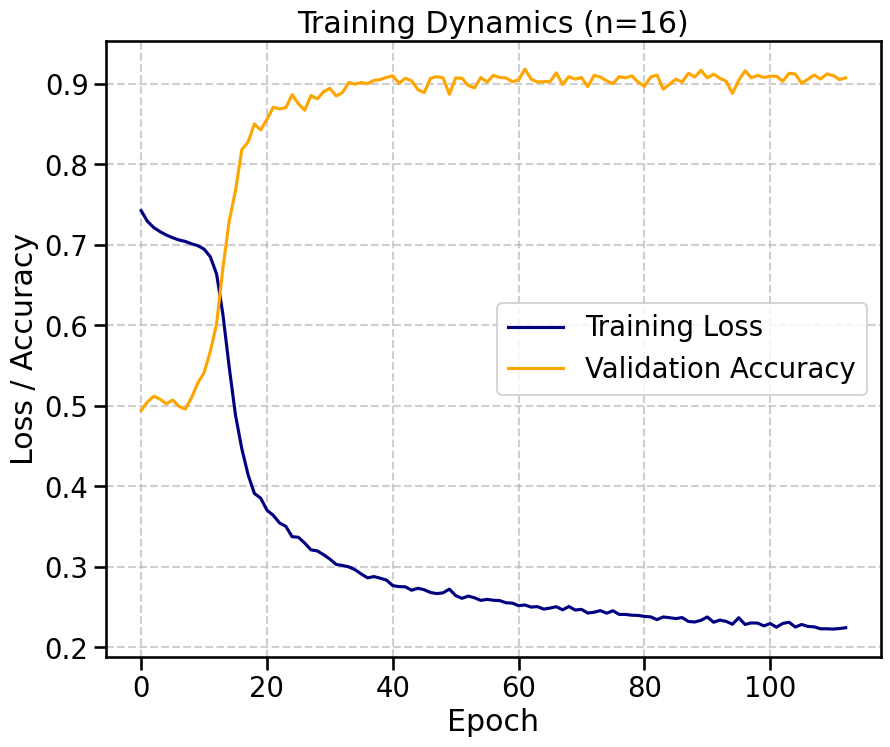

n=16 | Test Acc=0.9006 | F1=0.902 | AUC=0.945

=== Detailed Analysis for n=18 ===


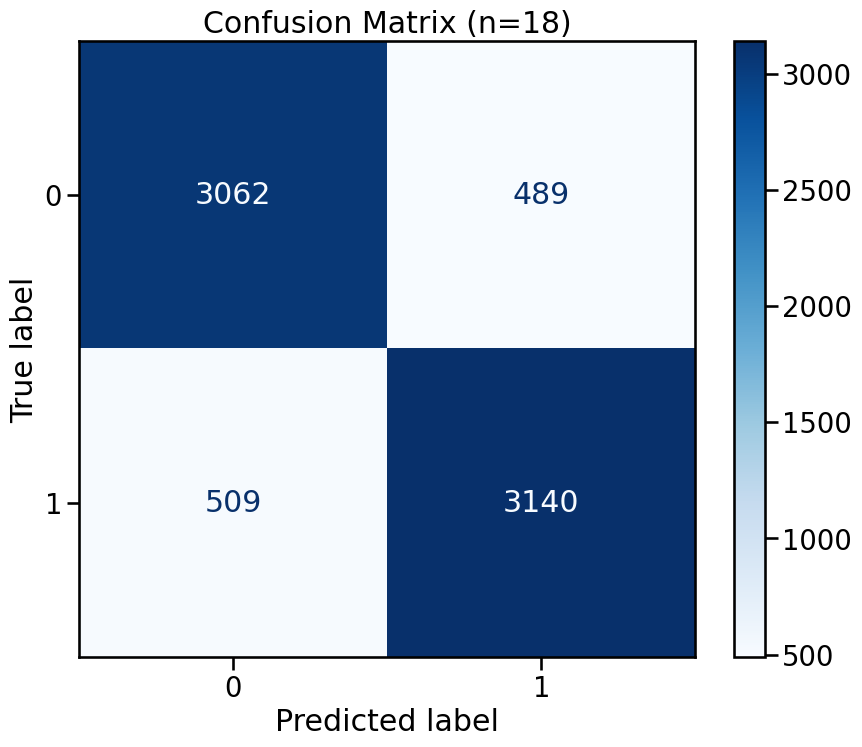

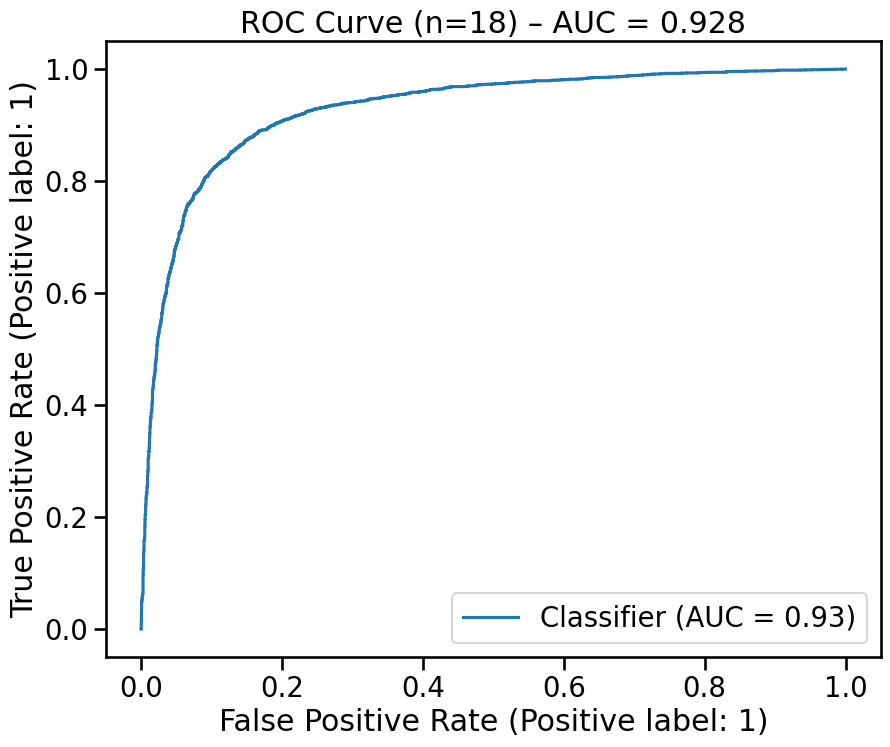

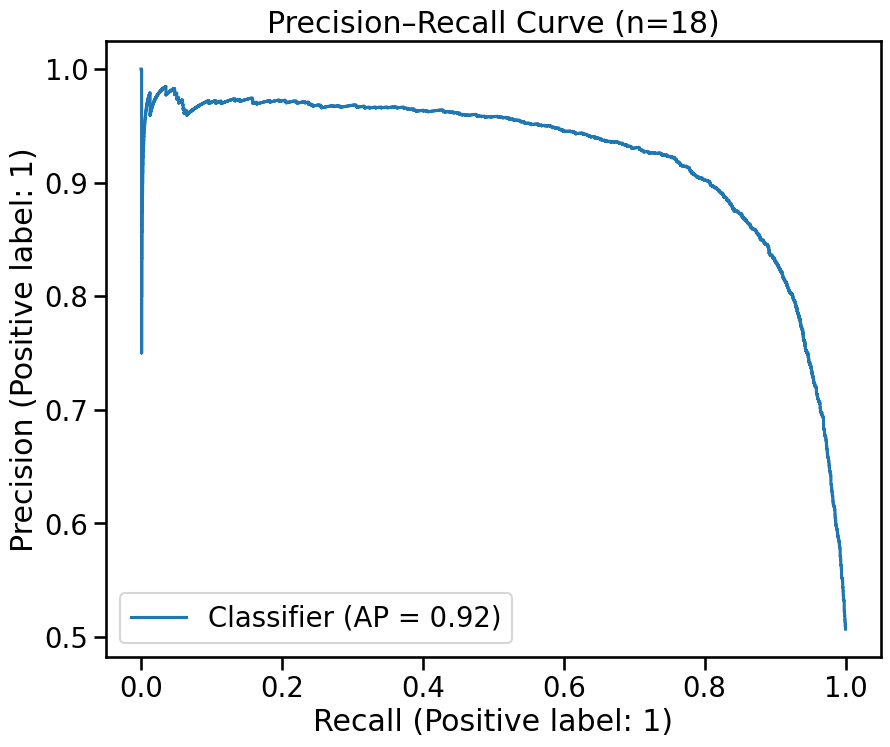

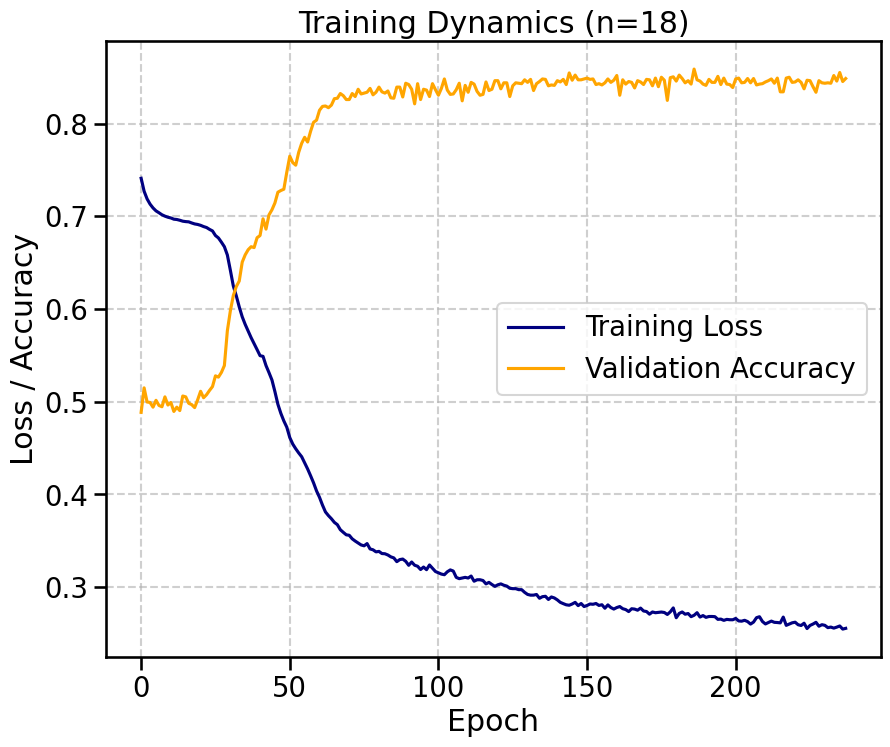

n=18 | Test Acc=0.8614 | F1=0.863 | AUC=0.928

=== Detailed Analysis for n=20 ===


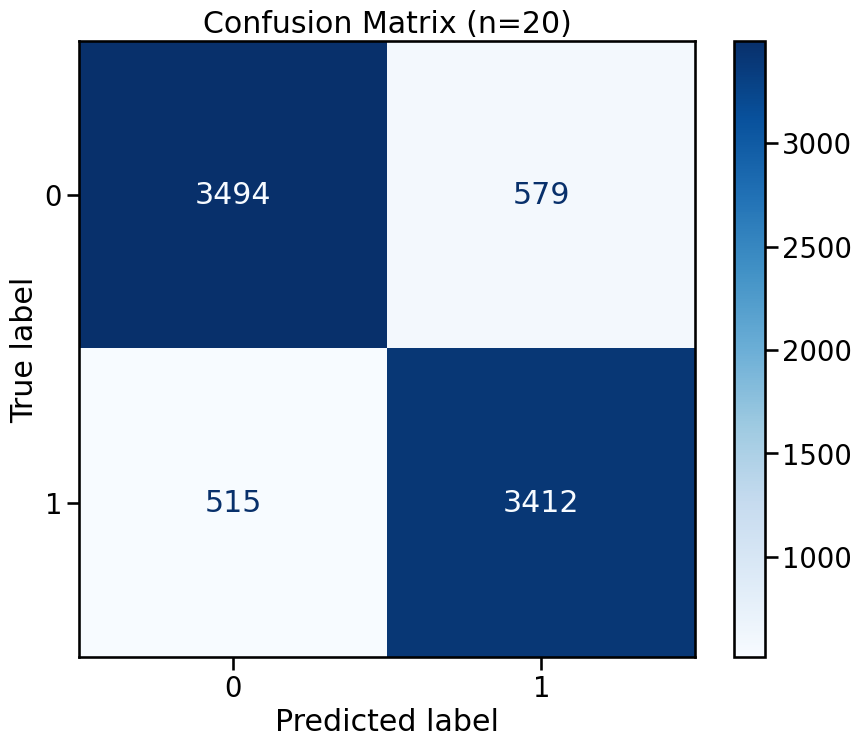

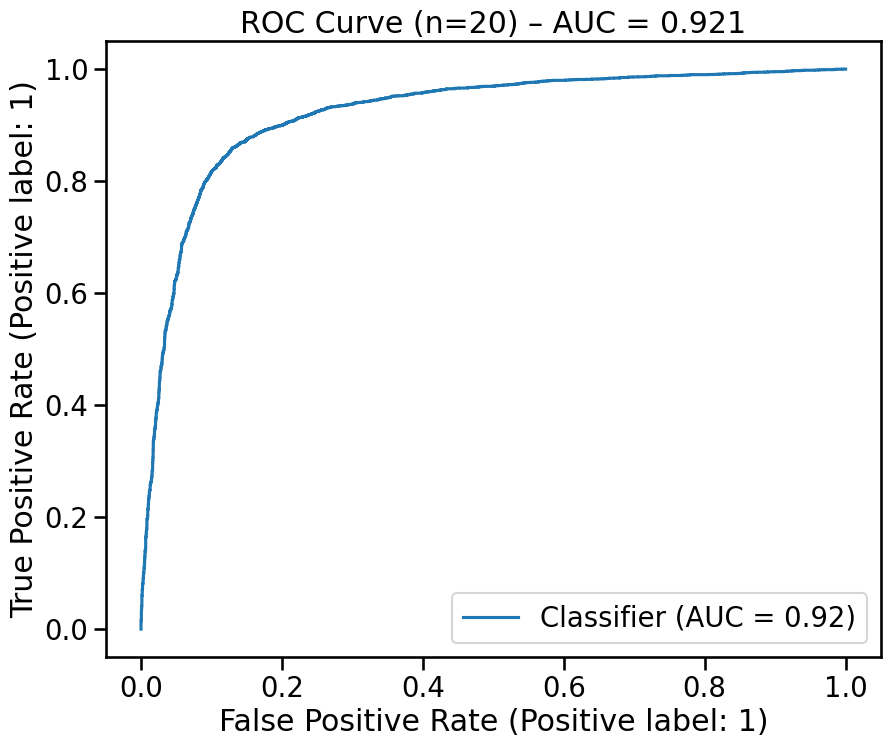

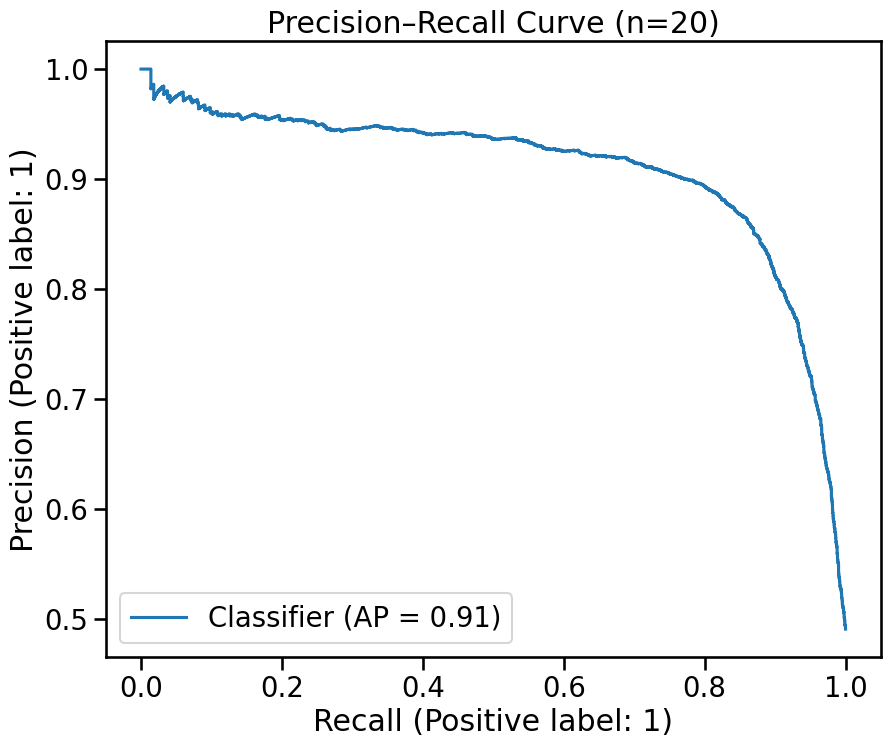

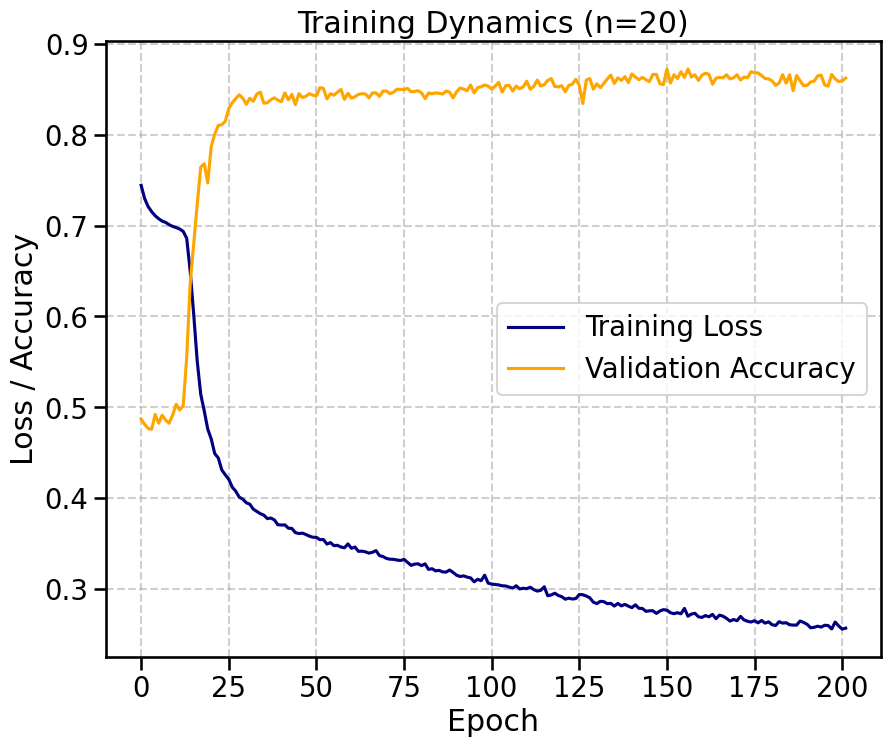

n=20 | Test Acc=0.8632 | F1=0.862 | AUC=0.921


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, RocCurveDisplay,
    f1_score, PrecisionRecallDisplay
)
import numpy as np

sns.set_context("talk", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 8)

# Target accuracies from the Kryptonite paper
target_acc = [0.94, 0.93, 0.92, 0.91, 0.80, 0.75]
target_acc = target_acc[:len(results)]  # match number of datasets

# Extract results
n_values = [r["n"] for r in results]
train_accs = [r["train_acc"] for r in results]
val_accs = [r["val_acc"] for r in results]
test_accs = [r["test_acc"] for r in results]

print("\n===== Extended Evaluation =====")
for i, n in enumerate(n_values):
    print(f"n={n:<3d} | Train={train_accs[i]:.4f} | Val={val_accs[i]:.4f} | Test={test_accs[i]:.4f}")

# 🔹 1️⃣ Accuracy Summary Bar Chart
plt.figure()
sns.lineplot(x=n_values, y=train_accs, marker="o", label="Train Accuracy")
sns.lineplot(x=n_values, y=val_accs, marker="s", label="Validation Accuracy")
sns.lineplot(x=n_values, y=test_accs, marker="^", label="Test Accuracy")
sns.lineplot(x=n_values, y=target_acc, linestyle="--", color="red", label="Target Accuracy (Paper)")
plt.title("Kryptonite-2.0: Accuracy vs Feature Dimension (n)")
plt.xlabel("Feature Dimension (n)")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 2️⃣ Per-dataset detailed plots
for i, n in enumerate(n_values):
    print(f"\n=== Detailed Analysis for n={n} ===")

    # Re-load the data for this dataset to generate metrics
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Retrain the model (for reproducibility)
    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 64, 32),
        activation='relu',
        solver='adam',
        max_iter=500,
        alpha=0.1,
        random_state=42,
        verbose=False,
        learning_rate_init=0.001,
        batch_size=128,
        early_stopping=True,
        n_iter_no_change=50
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_proba = mlp.predict_proba(X_test)[:, 1]

    # 🔸 Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title(f"Confusion Matrix (n={n})")
    plt.show()

    # 🔸 ROC Curve
    auc = roc_auc_score(y_test, y_proba)
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve (n={n}) – AUC = {auc:.3f}")
    plt.show()

    # 🔸 Precision-Recall Curve
    PrecisionRecallDisplay.from_predictions(y_test, y_proba)
    plt.title(f"Precision–Recall Curve (n={n})")
    plt.show()

    # 🔸 Optional: Loss & Validation Curve (if early_stopping=True)
    if hasattr(mlp, "loss_curve_"):
        plt.figure()
        plt.plot(mlp.loss_curve_, label="Training Loss", color="navy")
        if hasattr(mlp, "validation_scores_"):
            plt.plot(mlp.validation_scores_, label="Validation Accuracy", color="orange")
        plt.xlabel("Epoch")
        plt.ylabel("Loss / Accuracy")
        plt.title(f"Training Dynamics (n={n})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

    # 🔸 Additional metrics
    f1 = f1_score(y_test, y_pred)
    print(f"n={n} | Test Acc={test_accs[i]:.4f} | F1={f1:.3f} | AUC={auc:.3f}")


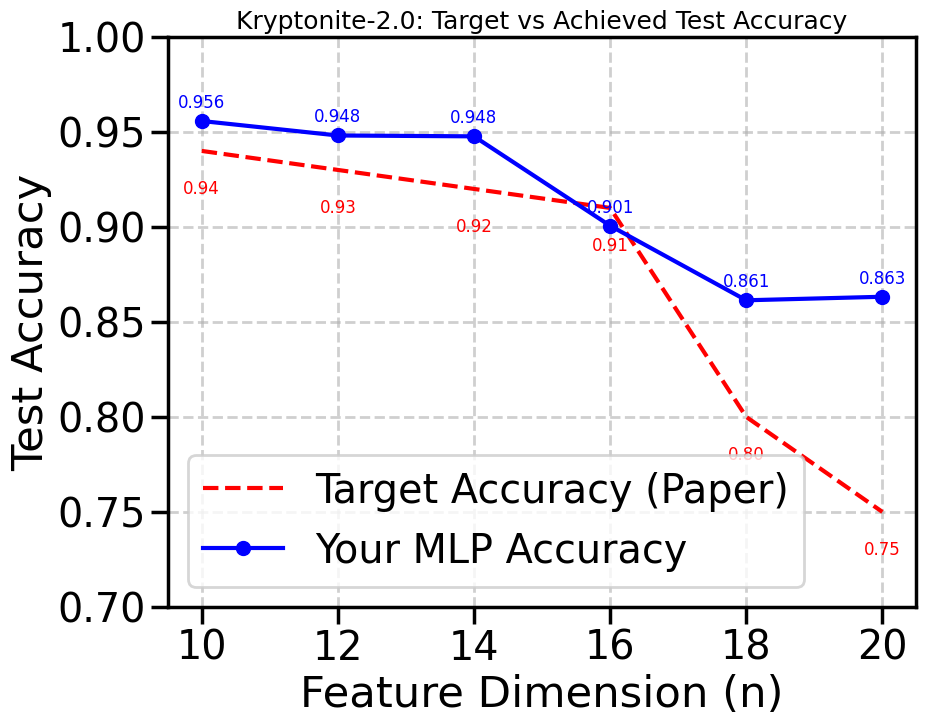

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target accuracies from the Kryptonite paper
target_acc = [0.94, 0.93, 0.92, 0.91, 0.80, 0.75]

# Extract your results
n_values = [r['n'] for r in results]
my_acc = [r['test_acc'] for r in results]

# Plot
sns.set_context("poster", font_scale=1.3)
plt.figure(figsize=(10, 8))

plt.plot(n_values, target_acc, 'r--', linewidth=3, label="Target Accuracy (Paper)")
plt.plot(n_values, my_acc, 'bo-', linewidth=3, markersize=10, label="Your MLP Accuracy")

# Annotate each point
for n, acc in zip(n_values, my_acc):
    plt.text(n, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', color='b', fontsize=12)
for n, acc in zip(n_values, target_acc):
    plt.text(n, acc - 0.015, f"{acc:.2f}", ha='center', va='top', color='r', fontsize=12)

# Aesthetics
plt.title("Kryptonite-2.0: Target vs Achieved Test Accuracy", fontsize=18)
plt.xlabel("Feature Dimension (n)")
plt.ylabel("Test Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import json

# 🔹 You can extend these later once the run works
possible_n_vals = [10]
possible_e_vals = [9]

def run_poly_logistic_regression(n, e):
    # --- Load data ---
    X = np.load(f'Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')
    
    # --- Split data ---
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"\n===== Running: n={n}, degree={e} =====")
    print(f"Train shape: {X_train.shape}")

    # --- Polynomial expansion ---
    poly = PolynomialFeatures(degree=e)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly   = poly.transform(X_val)
    X_test_poly  = poly.transform(X_test)

    features = X_train_poly.shape[-1]
    print(f"Expanded features: {features}")

    # --- Initialize and fit logistic regression ---
    logreg = LogisticRegression(max_iter=50000, solver='lbfgs', C=0.5)
    print("Training logistic regression model...")
    logreg.fit(X_train_poly, y_train)
    print("✅ Model fitted")

    # --- Evaluate on training data ---
    y_train_pred = logreg.predict(X_train_poly)
    y_train_proba = logreg.predict_proba(X_train_poly)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_loss = log_loss(y_train, y_train_proba)

    # --- Evaluate on validation data ---
    y_val_pred = logreg.predict(X_val_poly)
    y_val_proba = logreg.predict_proba(X_val_poly)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_loss = log_loss(y_val, y_val_proba)

    # --- Evaluate on test data ---
    y_test_pred = logreg.predict(X_test_poly)
    y_test_proba = logreg.predict_proba(X_test_poly)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_loss = log_loss(y_test, y_test_proba)

    print(f"📊 Train acc={train_acc:.4f}, loss={train_loss:.4f} | Val acc={val_acc:.4f}, loss={val_loss:.4f} | Test acc={test_acc:.4f}, loss={test_loss:.4f}")

    return {
        "n": n,
        "degree": e,
        "features": features,
        "train_acc": train_acc,
        "train_loss": train_loss,
        "val_acc": val_acc,
        "val_loss": val_loss,
        "test_acc": test_acc,
        "test_loss": test_loss
    }

# --- Main experiment loop ---
results = []
for n in tqdm(possible_n_vals, desc="Datasets"):
    for e in tqdm(possible_e_vals, desc=f"Degrees for n={n}", leave=False):
        res = run_poly_logistic_regression(n, e)
        results.append(res)

# --- Quick summary printout ---
for r in results:
    print(f"n={r['n']}, deg={r['degree']} → train_acc={r['train_acc']:.3f}, val_acc={r['val_acc']:.3f}, test_acc={r['test_acc']:.3f}")


Datasets:   0%|          | 0/1 [00:00<?, ?it/s]


===== Running: n=10, degree=9 =====
Train shape: (8000, 10)
Expanded features: 92378
Training logistic regression model...
✅ Model fitted


Datasets: 100%|██████████| 1/1 [16:02<00:00, 962.02s/it]

📊 Train acc=0.9890, loss=0.1154 | Val acc=0.8510, loss=0.4362 | Test acc=0.8473, loss=0.4456
n=10, deg=9 → train_acc=0.989, val_acc=0.851, test_acc=0.847


In [ ]:
from tqdm import tqdm

acc_by_n = []
feat_by_n = []
for n in tqdm(possible_n_vals):
    single_n = []
    single_feat = []
    for e in tqdm(possible_e_vals):
        acc, feat = run_poly_logistic_regression(n, e)
        single_n.append(acc)
        single_feat.append(feat)
    acc_by_n.append(single_n)
    feat_by_n.append(single_feat)

print(acc_by_n)


In [9]:

n_values = [10, 12, 14, 16]

p_values = [1,2,3,4, 5]

presolved_acc_by_n = [[0.5201666666666667, 0.5131666666666667, 0.49416666666666664, 0.49983333333333335, 0.505], [0.5018055555555555, 0.5088888888888888, 0.5008333333333334, 0.5101388888888889, 0.5151388888888889], [0.51, 0.5059523809523809, 0.4963095238095238, 0.5021428571428571, 0.501547619047619], [0.5066666666666667, 0.4984375, 0.49635416666666665, 0.49614583333333334, 0.49916666666666665]]

presolved_feat_by_n = [[11, 66, 286, 1001, 3003], [13, 91, 455, 1820, 6188], [15, 120, 680, 3060, 11628], [17, 153, 969, 4845, 20349]]




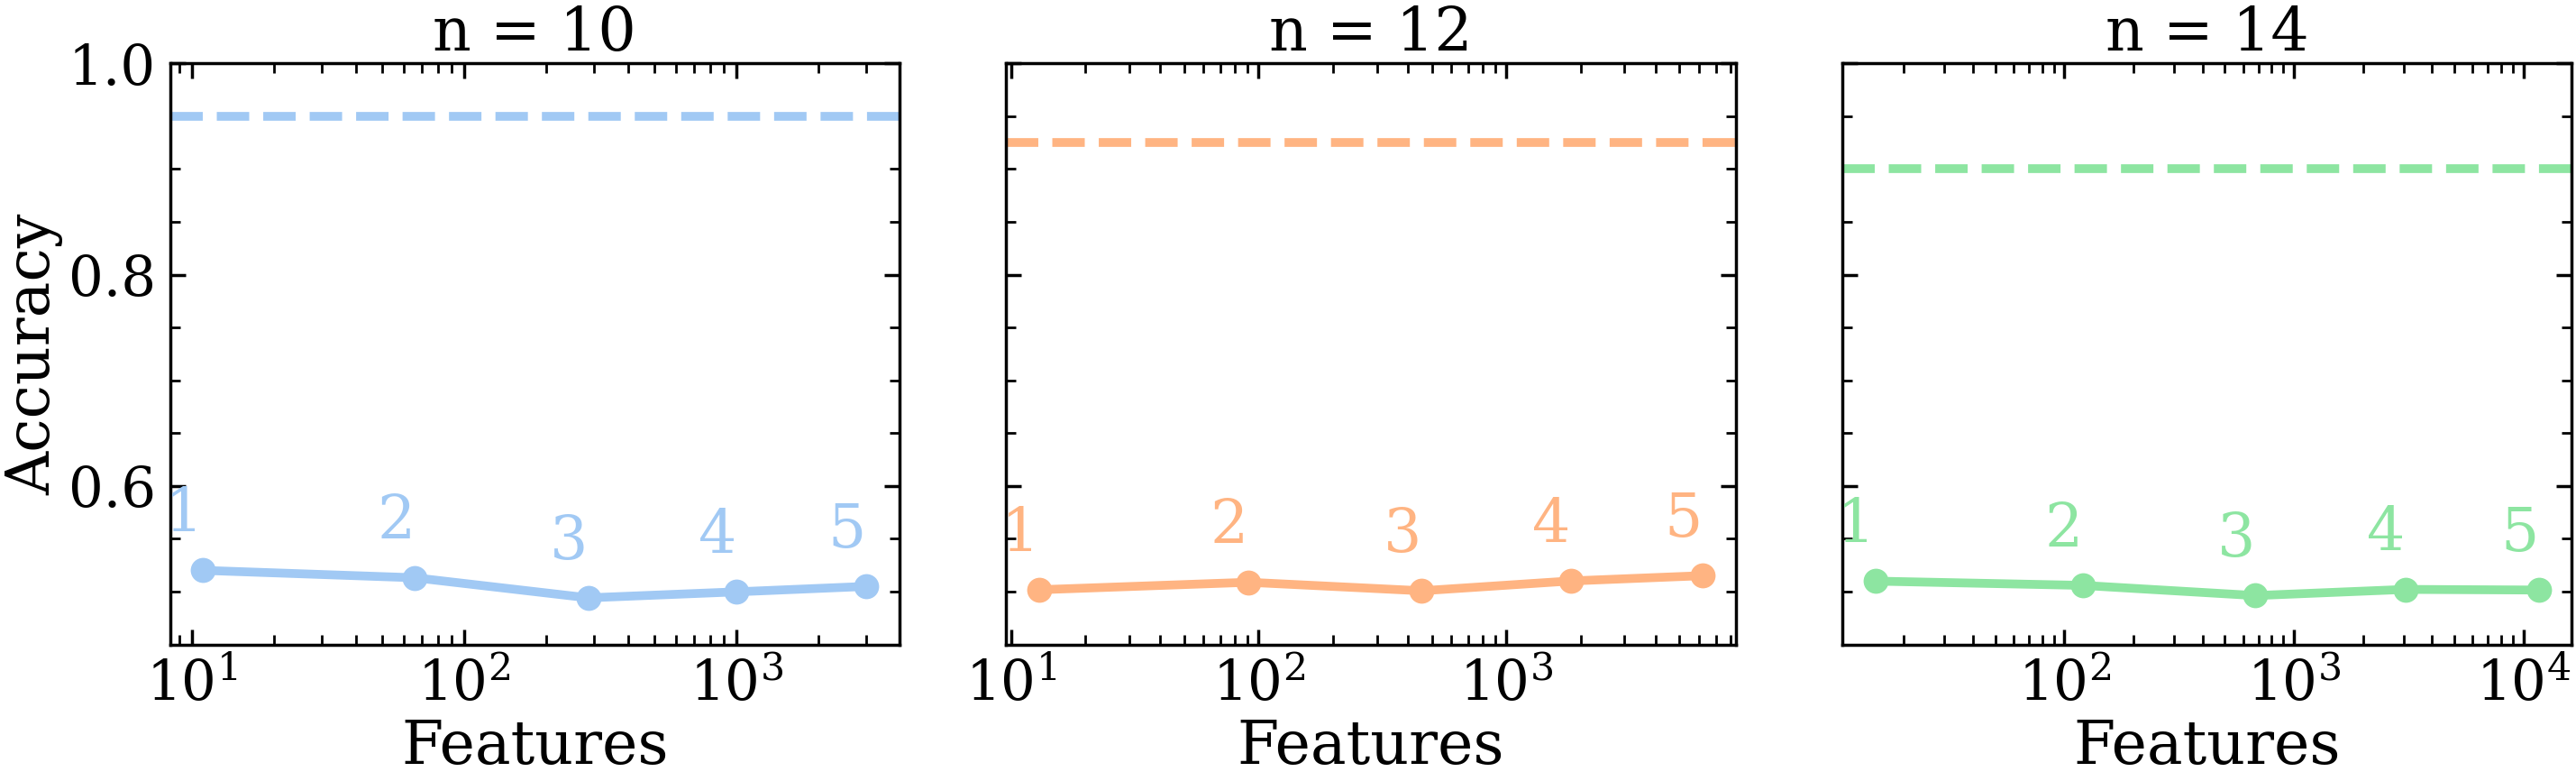

In [13]:
import matplotlib.pyplot as plt
import scienceplots  
plt.style.use('science')
plt.rcParams['text.usetex'] = False
import seaborn as sns
import numpy as np

# Data
possible_n_vals = [10, 12, 14]
possible_e_vals = [1,2,3,4,5,6,7]
n_values = [10, 12, 14, 16]
# Plot style
sns.set_context("poster", font_scale=2.0)
colors = sns.color_palette("pastel", 3)  # Pastel color palette

success_hlines = [0.95, 0.925, 0.9]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)

# Plot each n-value in its own subplot
for i, (n, ax) in enumerate(zip(n_values, axes)):
    ax.plot(presolved_feat_by_n[i], presolved_acc_by_n[i], marker='o', label=f'n = {n}', color=colors[i],
           lw=7, markersize=20)
    
    # Annotating with p-values in the same color as the line
    for j, (x, y) in enumerate(zip(presolved_feat_by_n[i], presolved_acc_by_n[i])):
        ax.text(x, y+0.025, f'{p_values[j]}',  ha='right', va='bottom', color=colors[i])
    
    ax.axhline(success_hlines[i], color=colors[i], linestyle='--', lw=7)
    # Customizing each subplot
    ax.set_title(f'n = {n}')
    ax.set_xlabel("Features")
    if i == 0:
        ax.set_ylabel("Accuracy")
    ax.set_xscale('log')
    
# Adjust layout
plt.tight_layout()
plt.ylim((0.45, 1.0))

# Show the plot
plt.show()

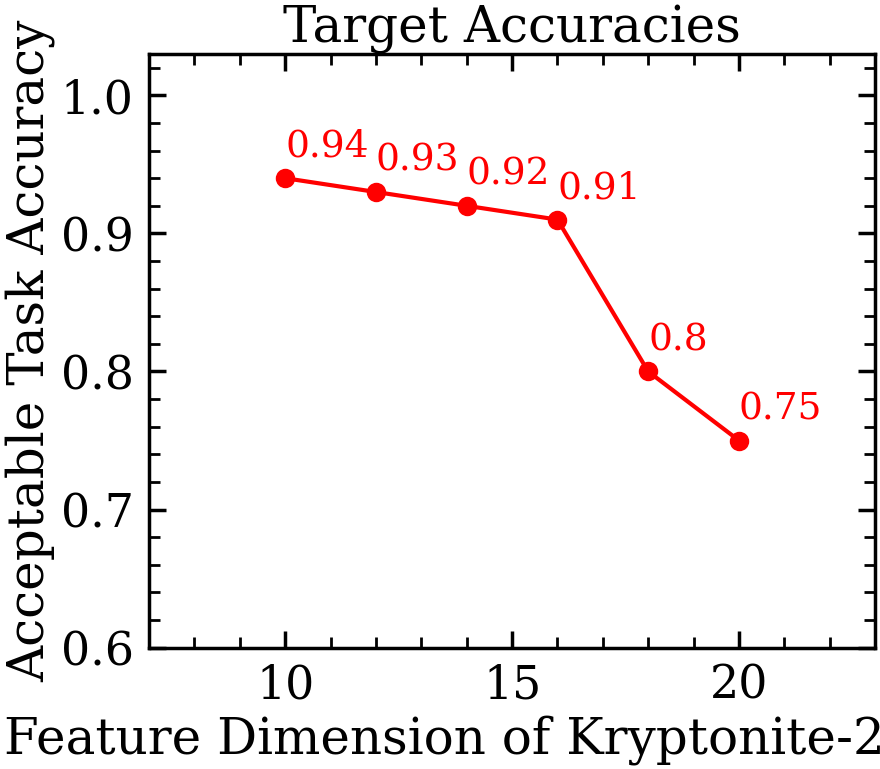

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

# Plot style
sns.set_context("poster", font_scale=1.5)
plt.figure(figsize=(10,8))

n = [10,12,14, 16,18,20]
succ = [0.94, 0.93, 0.92, 0.91, 0.8, 0.75]
plt.plot(n, succ, c='r')
plt.scatter(x=n, y=succ, c='r') 

ax = plt.gca()
# Annotating with p-values in the same color as the line
for j, (x, y) in enumerate(zip(n, succ)):
    ax.text(x, y+0.01, f'{succ[j]}',  ha='left', va='bottom', color='r', size=27)
        
# Adjust layout
plt.tight_layout()
plt.ylim((0.6, 1.03))
plt.xlim((7, 23))
# Show the plot

plt.title("Target Accuracies")
plt.ylabel("Acceptable Task Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-2.0 (n)")
plt.show()